## C7. Spatial mean of NDVI for exemplary EO Patch

#### 0. Load required libraries, site dependant constants and utility functions.

In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns
import datetime

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

#### 1. Load Exemplary LANDSAT EOPatch :

In [7]:
eo_patch = io_utils.load_exemplary_eopatch(date_range = site.DATE_RANGES_LANDSAT_8[6], patch_id=6, random_choice=True)
eo_patch

Loaded from ../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3177_maxcc_0.05_x-5_y-135


EOPatch(
  data: {
    DATASET_CLD_200_dil_6_str2: numpy.ndarray(shape=(32, 333, 333, 11), dtype=float32)
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(32, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(32, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(32, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.n

#### 2. Perform analysis for NDWI :

C:\Users\Kamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


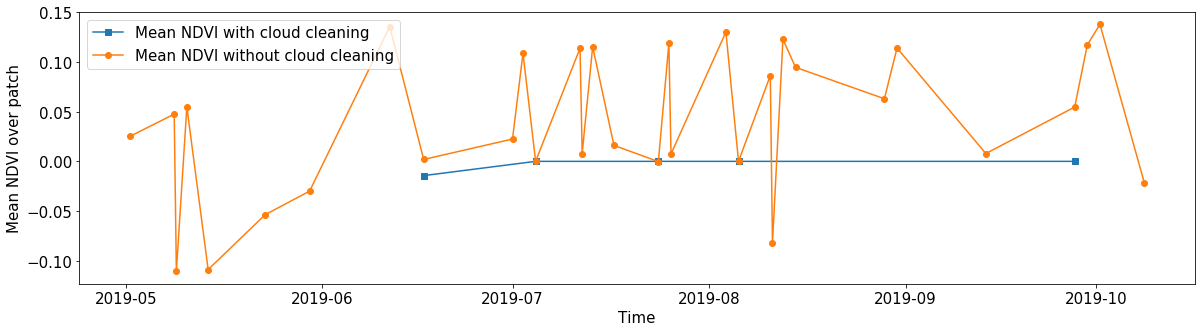

In [8]:
import matplotlib.pyplot as plt
ndvi = eo_patch.data['LANDSAT_NDWI'] # ndvi data cube
mask = eo_patch.mask['INVALID_DATA_MASK_CLD_150_STR1-IS_LDS-IS_MDS'] # apply ultimate mask 
time = np.array(eo_patch.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean NDVI with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean NDVI without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean NDVI over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

#### 3. Load Exemplary MODIS EOPatch :

In [11]:
eo_patch_modis = io_utils.load_exemplary_MODIS_eopatch()
eo_patch_modis

Loaded from ../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2013_04-2013_11/2979_maxcc_0.05_x-3_y-140


EOPatch(
  data: {
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS: numpy.ndarray(shape=(194, 333, 333, 7), dtype=float32)
  }
  mask: {
    IS_DATA: numpy.ndarray(shape=(194, 333, 333, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    index_x: 3
    index_y: 140
    maxcc: '0.05'
    patch_index: 2979
    service_type: 'wcs'
    site_name: 'UPE_PROMICE'
    size_x: '30m'
    size_y: '30m'
    time_difference: datetime.timedelta(seconds=7200)
    time_interval: ('2013-04-26', '2013-11-05')
  }
  bbox: BBox(((400000.0, 8130000.0), (410000.0, 8140000.0)), crs=EPSG:32622)
  timestamp: [datetime.datetime(2013, 4, 26, 12, 0), ..., datetime.datetime(2013, 11, 5, 12, 0

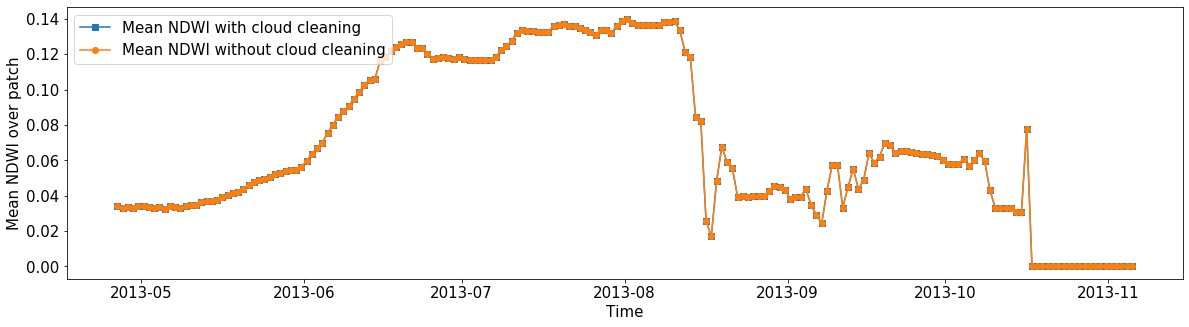

In [12]:
import matplotlib.pyplot as plt
ndvi = eo_patch_modis.data['MODIS_NDWI'] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean NDWI with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean NDWI without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean NDWI over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

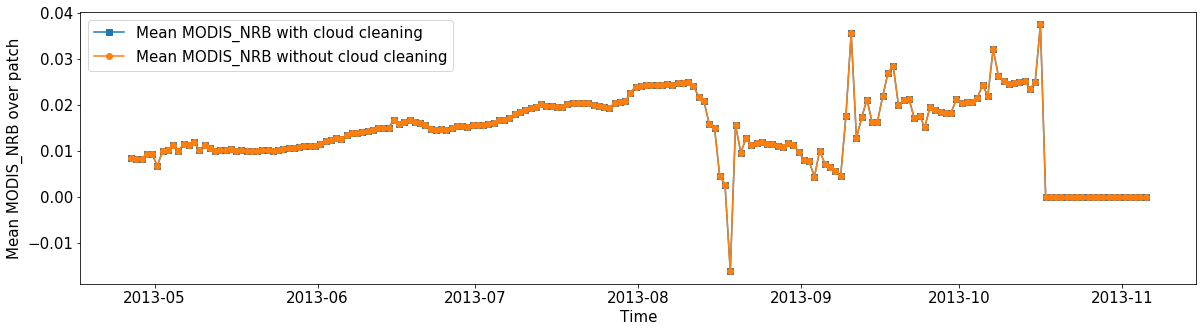

In [13]:

ndvi = eo_patch_modis.data['MODIS_NRB'] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean MODIS_NRB with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean MODIS_NRB without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean MODIS_NRB over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

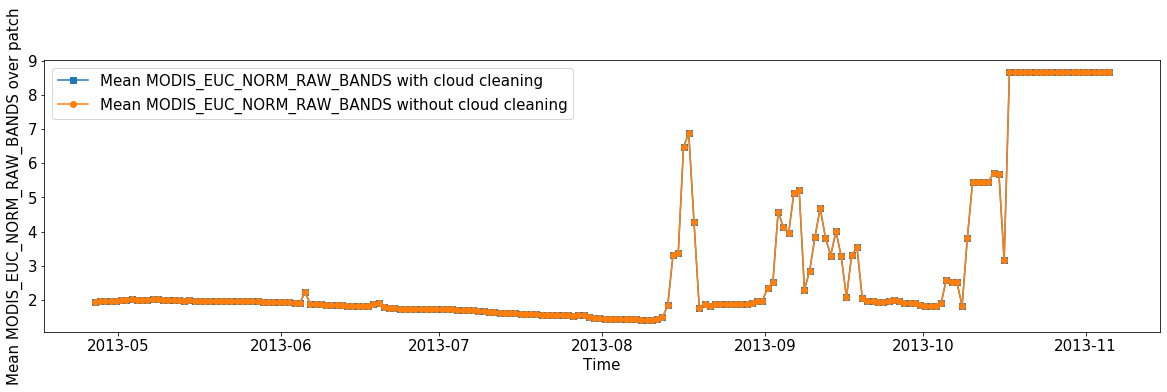

In [14]:

ndvi = eo_patch_modis.data['MODIS_EUC_NORM_RAW_BANDS'] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean MODIS_EUC_NORM_RAW_BANDS with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean MODIS_EUC_NORM_RAW_BANDS without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean MODIS_EUC_NORM_RAW_BANDS over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

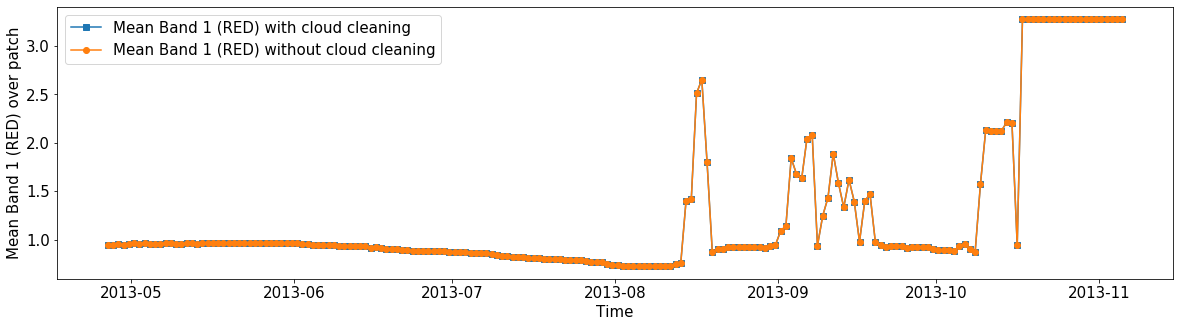

In [15]:

ndvi = eo_patch_modis.data['MODIS_RAW_BANDS'][..., 0][..., np.newaxis] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean Band 1 (RED) with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean Band 1 (RED) without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean Band 1 (RED) over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

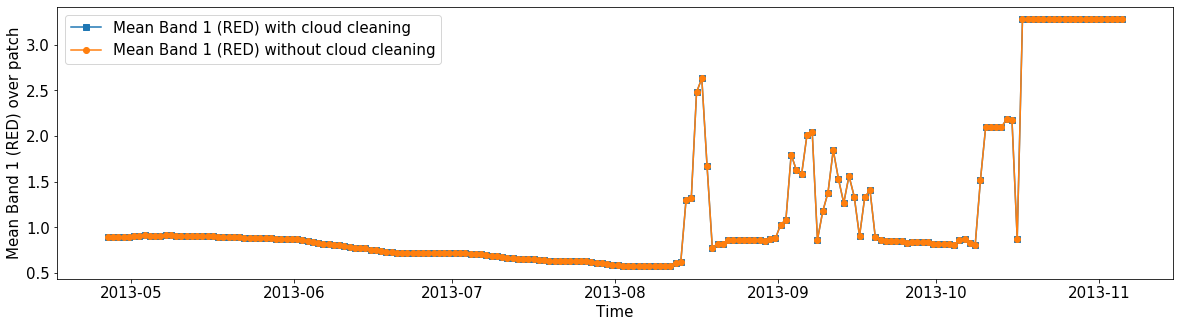

In [16]:

ndvi = eo_patch_modis.data['MODIS_RAW_BANDS'][..., 1][..., np.newaxis] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean Band 1 (RED) with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean Band 1 (RED) without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean Band 1 (RED) over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

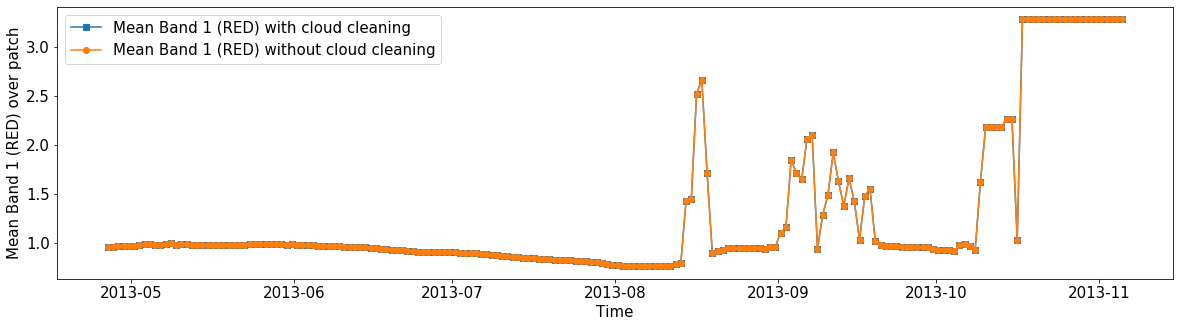

In [17]:

ndvi = eo_patch_modis.data['MODIS_RAW_BANDS'][..., 2][..., np.newaxis] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean Band 1 (RED) with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean Band 1 (RED) without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean Band 1 (RED) over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

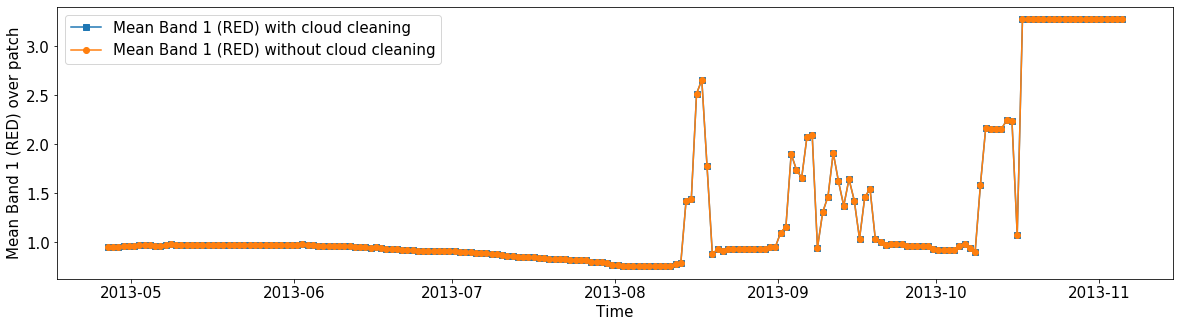

In [18]:

ndvi = eo_patch_modis.data['MODIS_RAW_BANDS'][..., 3][..., np.newaxis] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean Band 1 (RED) with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean Band 1 (RED) without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean Band 1 (RED) over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

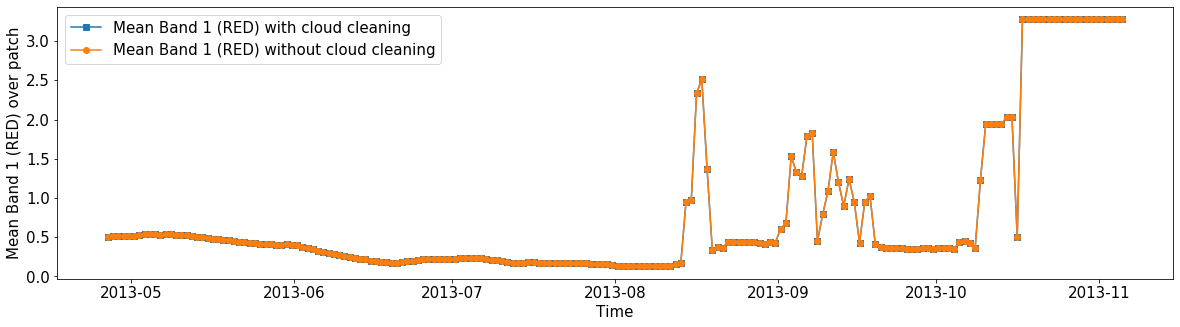

In [19]:

ndvi = eo_patch_modis.data['MODIS_RAW_BANDS'][..., 4][..., np.newaxis] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean Band 1 (RED) with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean Band 1 (RED) without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean Band 1 (RED) over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

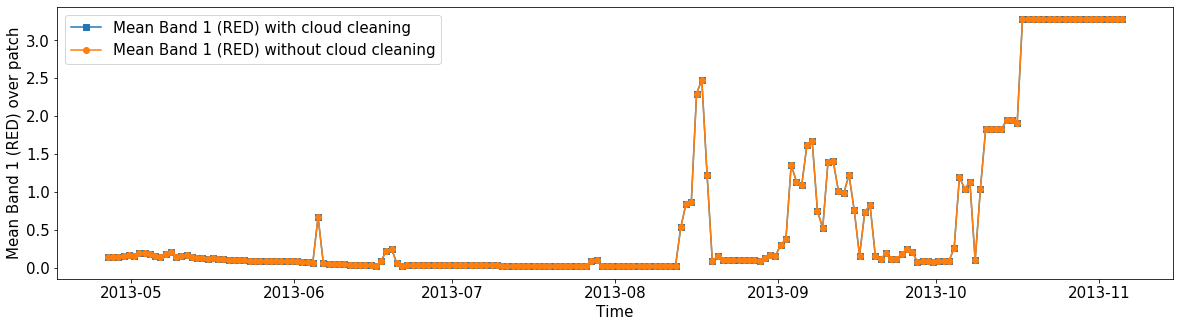

In [20]:

ndvi = eo_patch_modis.data['MODIS_RAW_BANDS'][..., 5][..., np.newaxis] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean Band 1 (RED) with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean Band 1 (RED) without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean Band 1 (RED) over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

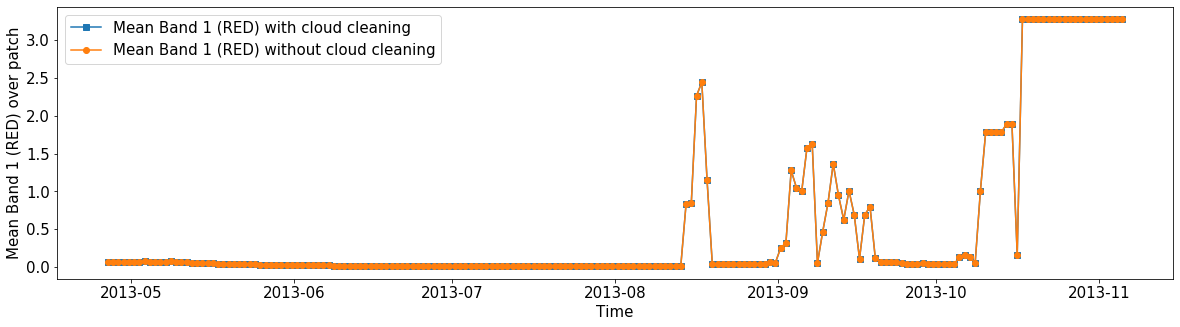

In [21]:

ndvi = eo_patch_modis.data['MODIS_RAW_BANDS'][..., 6][..., np.newaxis] # ndvi data cube
mask = eo_patch_modis.mask['IS_DATA'] # apply ultimate mask 
time = np.array(eo_patch_modis.timestamp) # x axis
t, w, h, _ = ndvi.shape 

ndvi_clean = ndvi.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's

# Calculate means, remove NaN's from means
ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean Band 1 (RED) with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean Band 1 (RED) without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean Band 1 (RED) over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

#### 3. Now, lets us try to print distribution over all the patches in one year

In [ ]:
ndvi_mean_list = []
ndvi_mean_clean_list= []
time_clean_list= []


error_count = 0
for date_range_landsat in site.DATE_RANGES_LANDSAT_8 :
    print('Reading EOPatches from:', date_range_landsat )
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_landsat)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    for eo_patch_file_name in list_of_available_patches:
        filepath = eopatches_filepath+eo_patch_file_name
        print(filepath)
        eo_patch = EOPatch.load(filepath)
        
        try:
            eopatch_ndvi = eo_patch_modis.data['LANDSAT_NDWI'] # ndvi data cube
            eopatch_mask = eo_patch_modis.mask['INVALID_DATA_MASK_CLD_150_STR2-IS_LDS-IS_MDS'] # apply ultimate mask
            eopatch_time = np.array(eo_patch_modis.timestamp) # x axis
        except Exception as e:
            print(repr(e))
            continue
        t, w, h, _ = ndvi.shape 

        ndvi_clean = ndvi.copy()
        ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN's
        
        # Calculate means, remove NaN's from means
        ndvi_mean = np.nanmean(ndvi.reshape(t, w * h).squeeze(), axis=1) 
        ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
        time_clean = time[~np.isnan(ndvi_mean_clean)]
        ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]
        
        ndvi_mean_list.append(ndvi_mean)
        ndvi_mean_clean_list.append(ndvi_mean_clean)
        time_clean_list.append(time_clean)
        
    break

In [ ]:
trzeba przejsc po wszytskich eo patche i mapowac je do jednej tablicy
jesli jest juz ta data wslowniku to dodajesz do listy ktora tam jest
jesli nie ma to dodajesz key z lista z jednym elementem 


In [ ]:
na koniec idziesz po kluczach po kolei i tworzysz z nich dzien julianski i obliczas srednia z chmurami i bez chmur, 
czyli na koniec masz, julian time []
ndwi z ch []
ndwi bez chmur []
i mozna rysowac

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Mean NDWI with cloud cleaning')
plt.plot(time, ndvi_mean, 'o-', label='Mean NDWI without cloud cleaning')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Mean NDWI over patch', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=2, prop={'size': 15});